In [2]:
# 현재 가상 머신을 자신의 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# geopandas 및 관련 패키지 설치
!pip install geopandas folium mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 72.4 MB/s eta 0:00:00


In [4]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rc('font', family='NanumBarunGothic') #한글 폰트 적용

In [5]:
import pandas as pd
import geopandas as gpd

In [6]:
# 종분포 데이터
gdf_pt = gpd.read_file('/content/gdrive/My Drive/Colab Notebooks/sea/data/geo_mbris_obis_edu_light2.gpkg', encoding="UTF-8")
gdf_pt.info()
gdf_pt.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fid         22083 non-null  float64 
 1   spc_scitf_  22083 non-null  object  
 2   comm_kor_n  16295 non-null  object  
 3   genus       22070 non-null  object  
 4   genus_nm    16435 non-null  object  
 5   family      22074 non-null  object  
 6   family_nm   16352 non-null  object  
 7   order_      22075 non-null  object  
 8   order_nm    16185 non-null  object  
 9   class       22080 non-null  object  
 10  class_nm    17128 non-null  object  
 11  phylum      22080 non-null  object  
 12  phylum_nm   20666 non-null  object  
 13  kingdom     22083 non-null  object  
 14  kingdom_nm  22083 non-null  object  
 15  lati_val    22083 non-null  float64 
 16  loti_val    22083 non-null  float64 
 17  col_bg_dt   22083 non-null  object  
 18  ssea_id     22083 non-null  object  
 

,fid,spc_scitf_,comm_kor_n,genus,genus_nm,family,family_nm,order_,order_nm,class,...,phylum_nm,kingdom,kingdom_nm,lati_val,loti_val,col_bg_dt,ssea_id,sstrnc_no,kind,geometry
0,27.0,Bacillus altitudinis,NaN,Bacillus,NaN,Bacillaceae,NaN,Caryophanales,NaN,Bacilli,...,NaN,Bacteria,세균계,37.284444,126.556389,20100424,W,5154-4,mbris,POINT (126.55639 37.28444)
1,31.0,Penicillium,NaN,Penicillium,NaN,Aspergillaceae,NaN,Eurotiales,NaN,Eurotiomycetes,...,NaN,Fungi,균계,36.226528,129.382583,20180919,ES,81-6,mbris,POINT (129.38258 36.22653)
2,34.0,Buccella,NaN,Buccella,NaN,Trichohyalidae,NaN,Rotaliida,NaN,Globothalamea,...,유공충문,Protista,원생생물계,35.983333,129.583333,20120626,ES,87-1,mbris,POINT (129.58333 35.98333)
3,60.0,Aetea anguina,자루이끼벌레,Aetea,자루이끼벌레속,Aeteidae,자루이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)
4,67.0,Bugula subglobosa,꽃다발이끼벌레,Bugula,다발이끼벌레속,Bugulidae,다발이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)


In [7]:
# 소해구 
gdf_sstrnc = gpd.read_file('/content/gdrive/My Drive/Colab Notebooks/sea/data/geo_zn_sstrnc.shp', encoding="UTF-8")
gdf_sstrnc.info()
gdf_sstrnc.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11839 entries, 0 to 11838
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   gid        11839 non-null  float64 
 1   lo_d       11839 non-null  float64 
 2   lo_m       11839 non-null  float64 
 3   lo_s       11839 non-null  float64 
 4   la_d       11839 non-null  float64 
 5   la_m       11839 non-null  float64 
 6   la_s       11839 non-null  float64 
 7   sstrnc_no  11839 non-null  object  
 8   geometry   11839 non-null  geometry
dtypes: float64(7), geometry(1), object(1)
memory usage: 832.6+ KB


,gid,lo_d,lo_m,lo_s,la_d,la_m,la_s,sstrnc_no,geometry
0,1.0,137.0,0.0,0.0,45.0,50.0,0.0,8147-1,"POLYGON ((137.00000 46.00000, 137.16667 46.000..."
1,2.0,137.0,10.0,0.0,45.0,50.0,0.0,8147-2,"POLYGON ((137.16667 46.00000, 137.33333 46.000..."
2,3.0,137.0,20.0,0.0,45.0,50.0,0.0,8147-3,"POLYGON ((137.33333 46.00000, 137.50000 46.000..."
3,4.0,137.0,30.0,0.0,45.0,50.0,0.0,8148-1,"POLYGON ((137.50000 46.00000, 137.66667 46.000..."
4,5.0,137.0,40.0,0.0,45.0,50.0,0.0,8148-2,"POLYGON ((137.66667 46.00000, 137.83333 46.000..."


In [8]:
# 종분포(포인트)에  소해구(폴리곤)를 공간조인  
gdf = gpd.sjoin(gdf_pt, gdf_sstrnc )
gdf.info()
gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 22083 entries, 0 to 22082
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   fid              22083 non-null  float64 
 1   spc_scitf_       22083 non-null  object  
 2   comm_kor_n       16295 non-null  object  
 3   genus            22070 non-null  object  
 4   genus_nm         16435 non-null  object  
 5   family           22074 non-null  object  
 6   family_nm        16352 non-null  object  
 7   order_           22075 non-null  object  
 8   order_nm         16185 non-null  object  
 9   class            22080 non-null  object  
 10  class_nm         17128 non-null  object  
 11  phylum           22080 non-null  object  
 12  phylum_nm        20666 non-null  object  
 13  kingdom          22083 non-null  object  
 14  kingdom_nm       22083 non-null  object  
 15  lati_val         22083 non-null  float64 
 16  loti_val         22083 non-null 

,fid,spc_scitf_,comm_kor_n,genus,genus_nm,family,family_nm,order_,order_nm,class,...,geometry,index_right,gid,lo_d,lo_m,lo_s,la_d,la_m,la_s,sstrnc_no_right
0,27.0,Bacillus altitudinis,NaN,Bacillus,NaN,Bacillaceae,NaN,Caryophanales,NaN,Bacilli,...,POINT (126.55639 37.28444),3612,3613.0,126.0,30.0,0.0,37.0,10.0,0.0,5154-4
18233,181983.0,Curtobacterium flaccumfaciens,NaN,Curtobacterium,NaN,Microbacteriaceae,NaN,Micrococcales,NaN,Actinomycetes,...,POINT (126.63139 37.17472),3612,3613.0,126.0,30.0,0.0,37.0,10.0,0.0,5154-4
18234,181993.0,Micrococcus aloeverae,NaN,Micrococcus,NaN,Micrococcaceae,NaN,Micrococcales,NaN,Actinomycetes,...,POINT (126.63139 37.17472),3612,3613.0,126.0,30.0,0.0,37.0,10.0,0.0,5154-4
18235,181995.0,Paraoerskovia marina,NaN,Paraoerskovia,NaN,Promicromonosporaceae,NaN,Micrococcales,NaN,Actinomycetes,...,POINT (126.63139 37.17472),3612,3613.0,126.0,30.0,0.0,37.0,10.0,0.0,5154-4
18236,181996.0,Rhodococcus qingshengii,NaN,Rhodococcus,NaN,Nocardiaceae,NaN,Mycobacteriales,NaN,Actinomycetes,...,POINT (126.63139 37.17472),3612,3613.0,126.0,30.0,0.0,37.0,10.0,0.0,5154-4


In [9]:
# 소해구별 건수 집계
df_size = gdf.groupby(['sstrnc_no_right'], as_index=False ).size() 
df_size.info()
df_size.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sstrnc_no_right  458 non-null    object
 1   size             458 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.3+ KB


,sstrnc_no_right,size
0,100-1,43
1,100-2,12
2,100-4,48
3,104-1,24
4,104-2,48


In [10]:
# 집계 결과를 소해구 폴리곤에 속성 조인
gdf_sstrnc2 = pd.merge(gdf_sstrnc, df_size, left_on='sstrnc_no', right_on='sstrnc_no_right', how='left')
gdf_sstrnc2.head()

,gid,lo_d,lo_m,lo_s,la_d,la_m,la_s,sstrnc_no,geometry,sstrnc_no_right,size
0,1.0,137.0,0.0,0.0,45.0,50.0,0.0,8147-1,"POLYGON ((137.00000 46.00000, 137.16667 46.000...",NaN,NaN
1,2.0,137.0,10.0,0.0,45.0,50.0,0.0,8147-2,"POLYGON ((137.16667 46.00000, 137.33333 46.000...",NaN,NaN
2,3.0,137.0,20.0,0.0,45.0,50.0,0.0,8147-3,"POLYGON ((137.33333 46.00000, 137.50000 46.000...",NaN,NaN
3,4.0,137.0,30.0,0.0,45.0,50.0,0.0,8148-1,"POLYGON ((137.50000 46.00000, 137.66667 46.000...",NaN,NaN
4,5.0,137.0,40.0,0.0,45.0,50.0,0.0,8148-2,"POLYGON ((137.66667 46.00000, 137.83333 46.000...",NaN,NaN


In [11]:
# 위의 결과에서 size가 null인 것은 제외
gdf_sstrnc3 = gdf_sstrnc2.loc[ gdf_sstrnc2.notnull()['size'] , :]
gdf_sstrnc3.head()

,gid,lo_d,lo_m,lo_s,la_d,la_m,la_s,sstrnc_no,geometry,sstrnc_no_right,size
2720,2721.0,128.0,20.0,0.0,38.0,30.0,0.0,47-9,"POLYGON ((128.33333 38.66667, 128.50000 38.666...",47-9,1.0
2834,2835.0,128.0,20.0,0.0,38.0,20.0,0.0,5055-3,"POLYGON ((128.33333 38.50000, 128.50000 38.500...",5055-3,122.0
2835,2836.0,128.0,30.0,0.0,38.0,20.0,0.0,55-1,"POLYGON ((128.50000 38.50000, 128.66667 38.500...",55-1,150.0
2837,2838.0,128.0,50.0,0.0,38.0,20.0,0.0,55-3,"POLYGON ((128.83333 38.50000, 129.00000 38.500...",55-3,2.0
2838,2839.0,129.0,0.0,0.0,38.0,20.0,0.0,56-1,"POLYGON ((129.00000 38.50000, 129.16667 38.500...",56-1,1.0


In [12]:
import mapclassify as mc

<Axes: >

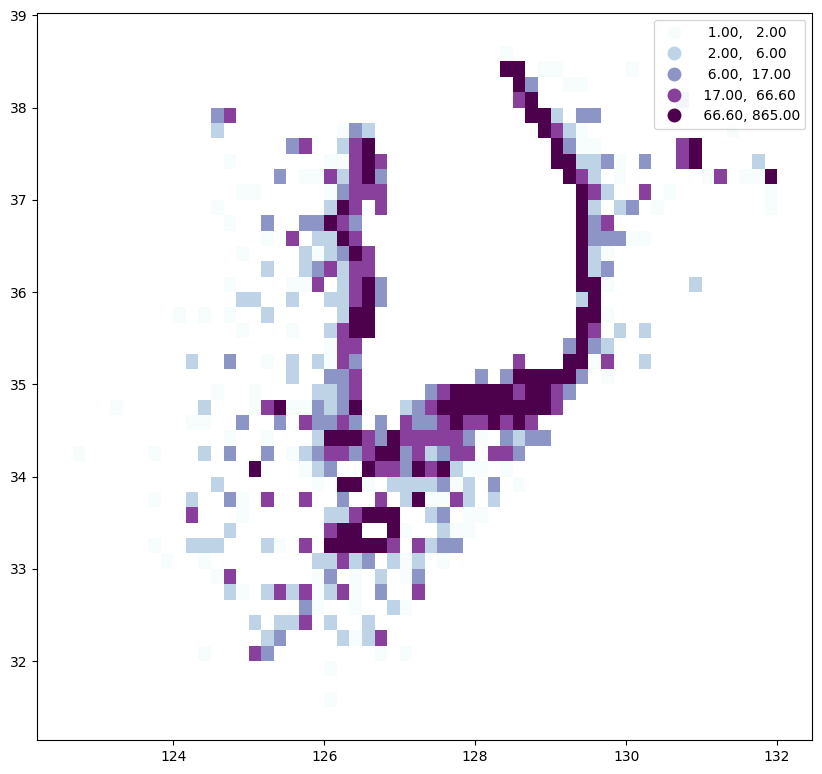

In [13]:
gdf_sstrnc3.plot(column='size'              # 정량 속성 항목
                 , scheme='QUANTILES'       # 단계 구분 기법
                 , k=5                      #단계(등급) 갯수
                 , cmap='BuPu'              #컬러맵
                 , legend=True
                 , figsize=(10, 10))     

<Axes: >

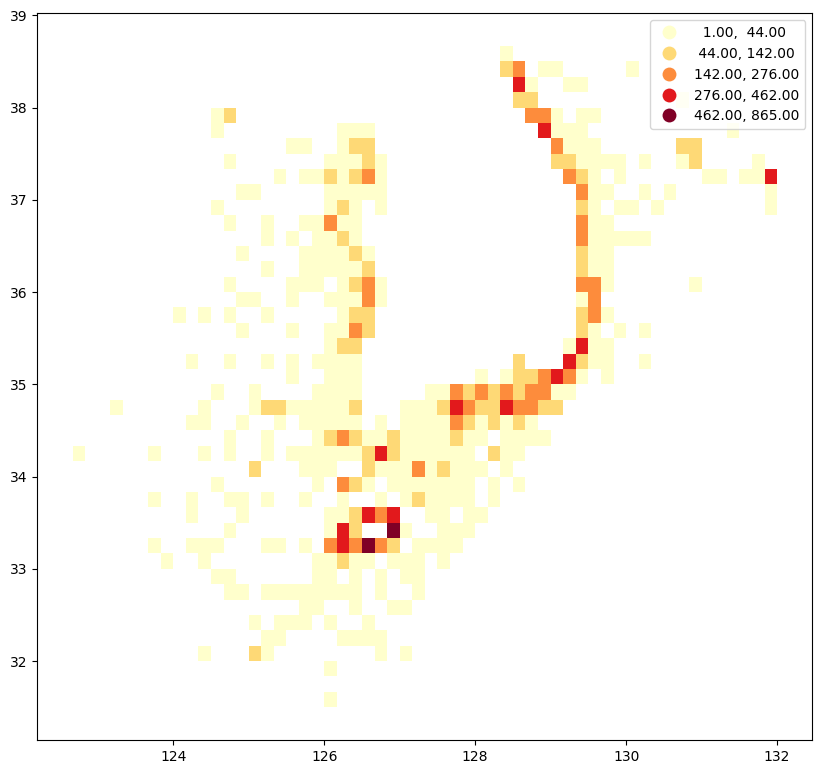

In [14]:
gdf_sstrnc3.plot(column='size', scheme='NaturalBreaks', k=5, cmap='YlOrRd', legend=True, figsize=(10, 10))   

Matplotlib의 Colormap 설명   
https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [17]:
gdf_sstrnc3.explore(column='size', scheme='NaturalBreaks', k=5, cmap='YlOrRd', legend=True, tiles='http://mt0.google.com/vt/lyrs=y&hl=en&x={x}&y={y}&z={z}&s=Ga', attr='google')   